# 1. Data Exploration

In [1]:
# Importing all libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report , accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve , ROCAUC , ConfusionMatrix
from yellowbrick.model_selection import LearningCurve , FeatureImportances


# Library settings:
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file in pandas:

dfn = pd.read_csv(r"G:\Oneeka\Cardinality\heart.csv")

# Converting into a dataframe:

df = pd.DataFrame(dfn)
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Checking the data type of all columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Inference: Out of 14 datatypes, there are 13 integer type and 1 is float type.

In [4]:
# Checking for unique values in each feature:

nu = df.nunique().sort_values()
nu

sex           2
fbs           2
exang         2
target        2
restecg       3
slope         3
cp            4
thal          4
ca            5
oldpeak      40
age          41
trestbps     49
thalach      91
chol        152
dtype: int64

In [5]:
# Classifying into Categorical and Numerical Features:

nf = [] ; cf = []

target = 'target'

features = [i for i in df.columns.values if i not in [target]]


for i in range(df[features].shape[1]): # shape of cols is 14 in our case
    if nu.values[i]<=10:
        cf.append(nu.index[i])
    else:
        nf.append(nu.index[i])

        
print('The Dataset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))

The Dataset has 4 numerical & 9 categorical features.


In [6]:
# Checking stats for all columns: to ensure it for further use like histogram

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [27]:
# Checking for any null values: if there any null value we can drop, replace etc

df.isnull().sum()

#[features for features in df.columns if df[features].isnull().sum()>0]

age          0
sex          0
trestbps     0
chol         0
fbs          0
thalach      0
exang        0
oldpeak      0
target       0
cp_0         0
cp_1         0
cp_2         0
cp_3         0
restecg_0    0
restecg_1    0
restecg_2    0
thal_0       0
thal_1       0
thal_2       0
thal_3       0
slope_0      0
slope_1      0
slope_2      0
ca_0         0
ca_1         0
ca_2         0
ca_3         0
ca_4         0
dtype: int64

Inference: There are no missing values in the dataset.

# 2. Exploratory Data Analysis

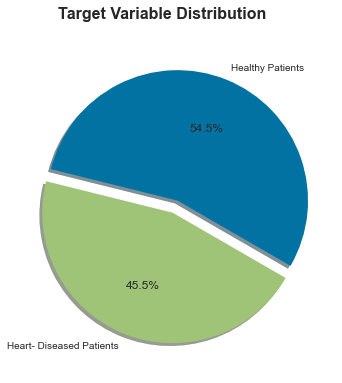

In [8]:
# Analyzing the distribution of the target variable:

# Setting labels and order:
labels = ['Healthy Patients' , 'Heart- Diseased Patients']
order = df['target'] .value_counts().index
explode = [0.1 , 0]

# Size of the figure:
plt.figure(figsize = [12,6])
plt.suptitle('Target Variable Distribution', fontweight = 'heavy', fontsize = 16)

# Pie Chart:
plt.pie(df['target'].value_counts() , labels = labels, shadow = True, explode = explode, autopct = '%1.1f%%', radius = 1,
       startangle = -30)
plt.show()

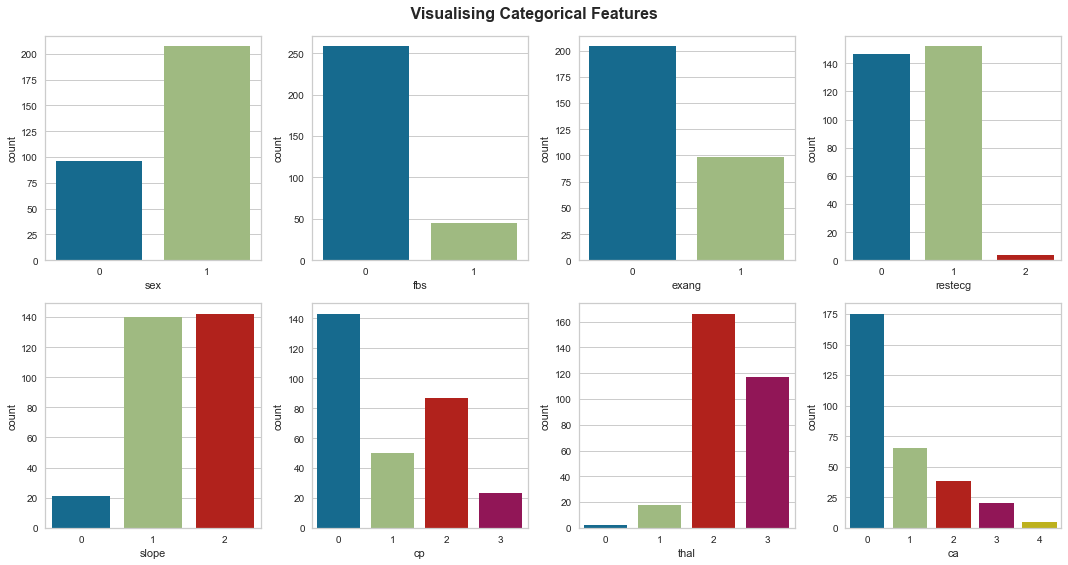

In [9]:
# Analyzing all categorical features:
#plt.subplot(total no of rows, total no of columns, plot number)


cf = ['sex', 'fbs', 'exang','restecg','slope', 'cp', 'thal', 'ca']
list(enumerate(cf))

plt.figure(figsize = [15,8])
plt.suptitle('Visualising Categorical Features'.center(50), fontweight = 'heavy', fontsize = 16)


for i in enumerate(cf):
    plt.subplot(2,4, i[0]+1)
    sns.countplot(i[1] , data = df )
plt.tight_layout()   
plt.show()


 Inference:
1. Male patients are higher. 
2. It can be seen that the number of patients with fasting blood sugar less than 120 mg/dl have the highest numbers.
3. Patients with no exercise induced angina are the highest compared to patients with exercise induced angina.
4. Resting electrocardiographic with results 1 and 0 has a higher distribution than result 2. In addition, result 1 has the highest distribution compared to the other results.
5.  The distribution of slope 1 and 2 are almost the same. Moreover, slope 2 has the highest distribution compared to others.
6. Chest pain type 0 have the highest number as compared to oyher chest pain types.
7. People with 0 major vessel has the highest distribution compared to others.
8. Patients with 2 "thal" has the highest distribution compared to others.

<Figure size 576x396 with 0 Axes>

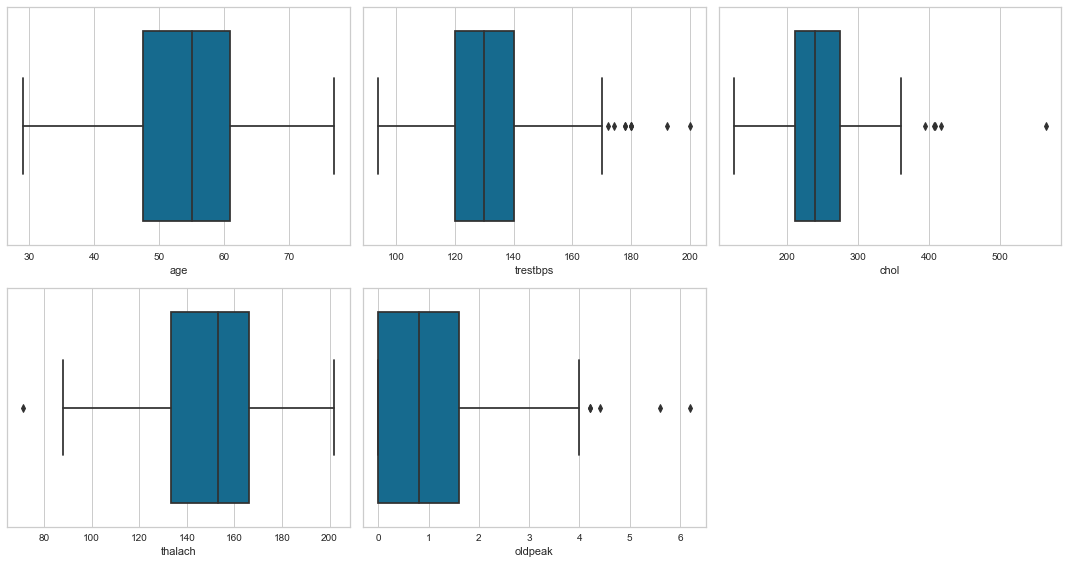

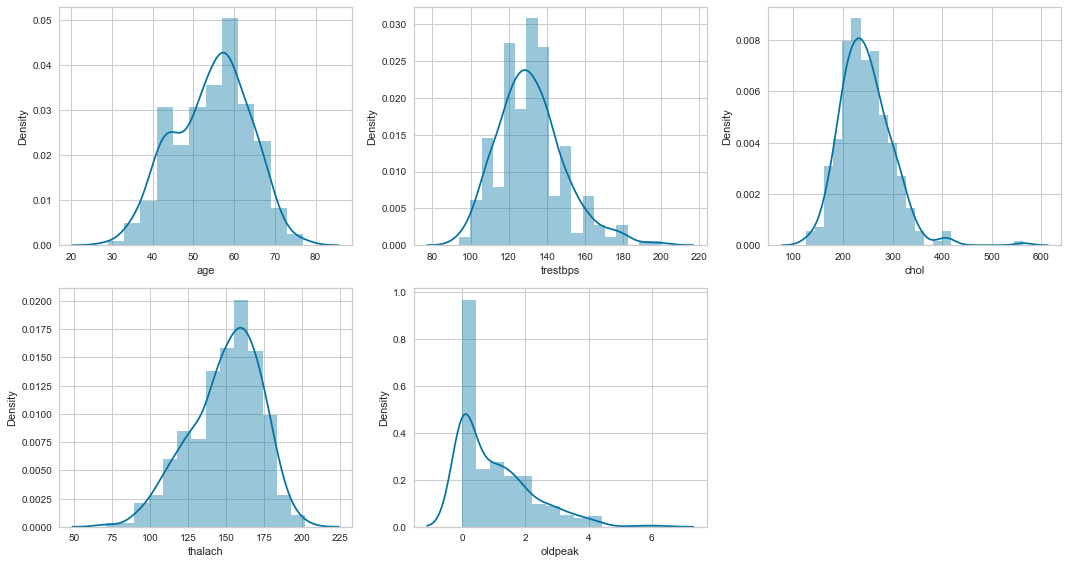

In [10]:
# Analyzing Numerical Features:

nf = ['age', 'trestbps', 'chol','thalach', 'oldpeak']
list(enumerate(nf))

#Box Plot:
plt.suptitle('Visualising Numerical Features'.center(50), fontweight = 'heavy', fontsize = 16)
plt.figure(figsize = [15,8])
for i in enumerate(nf):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(i[1] , data = df)
    
plt.tight_layout()
plt.show()

# Dist Plot:
plt.figure(figsize = [15,8])
for i in range(len(nf)):
    plt.subplot(2,3,i+1)
    sns.distplot(df[nf[i]])
    
plt.tight_layout()
plt.show()

Inference: 

1. The features are almost distributed normally.
2. There are few outliers which need to be removed to improve the data accuracy

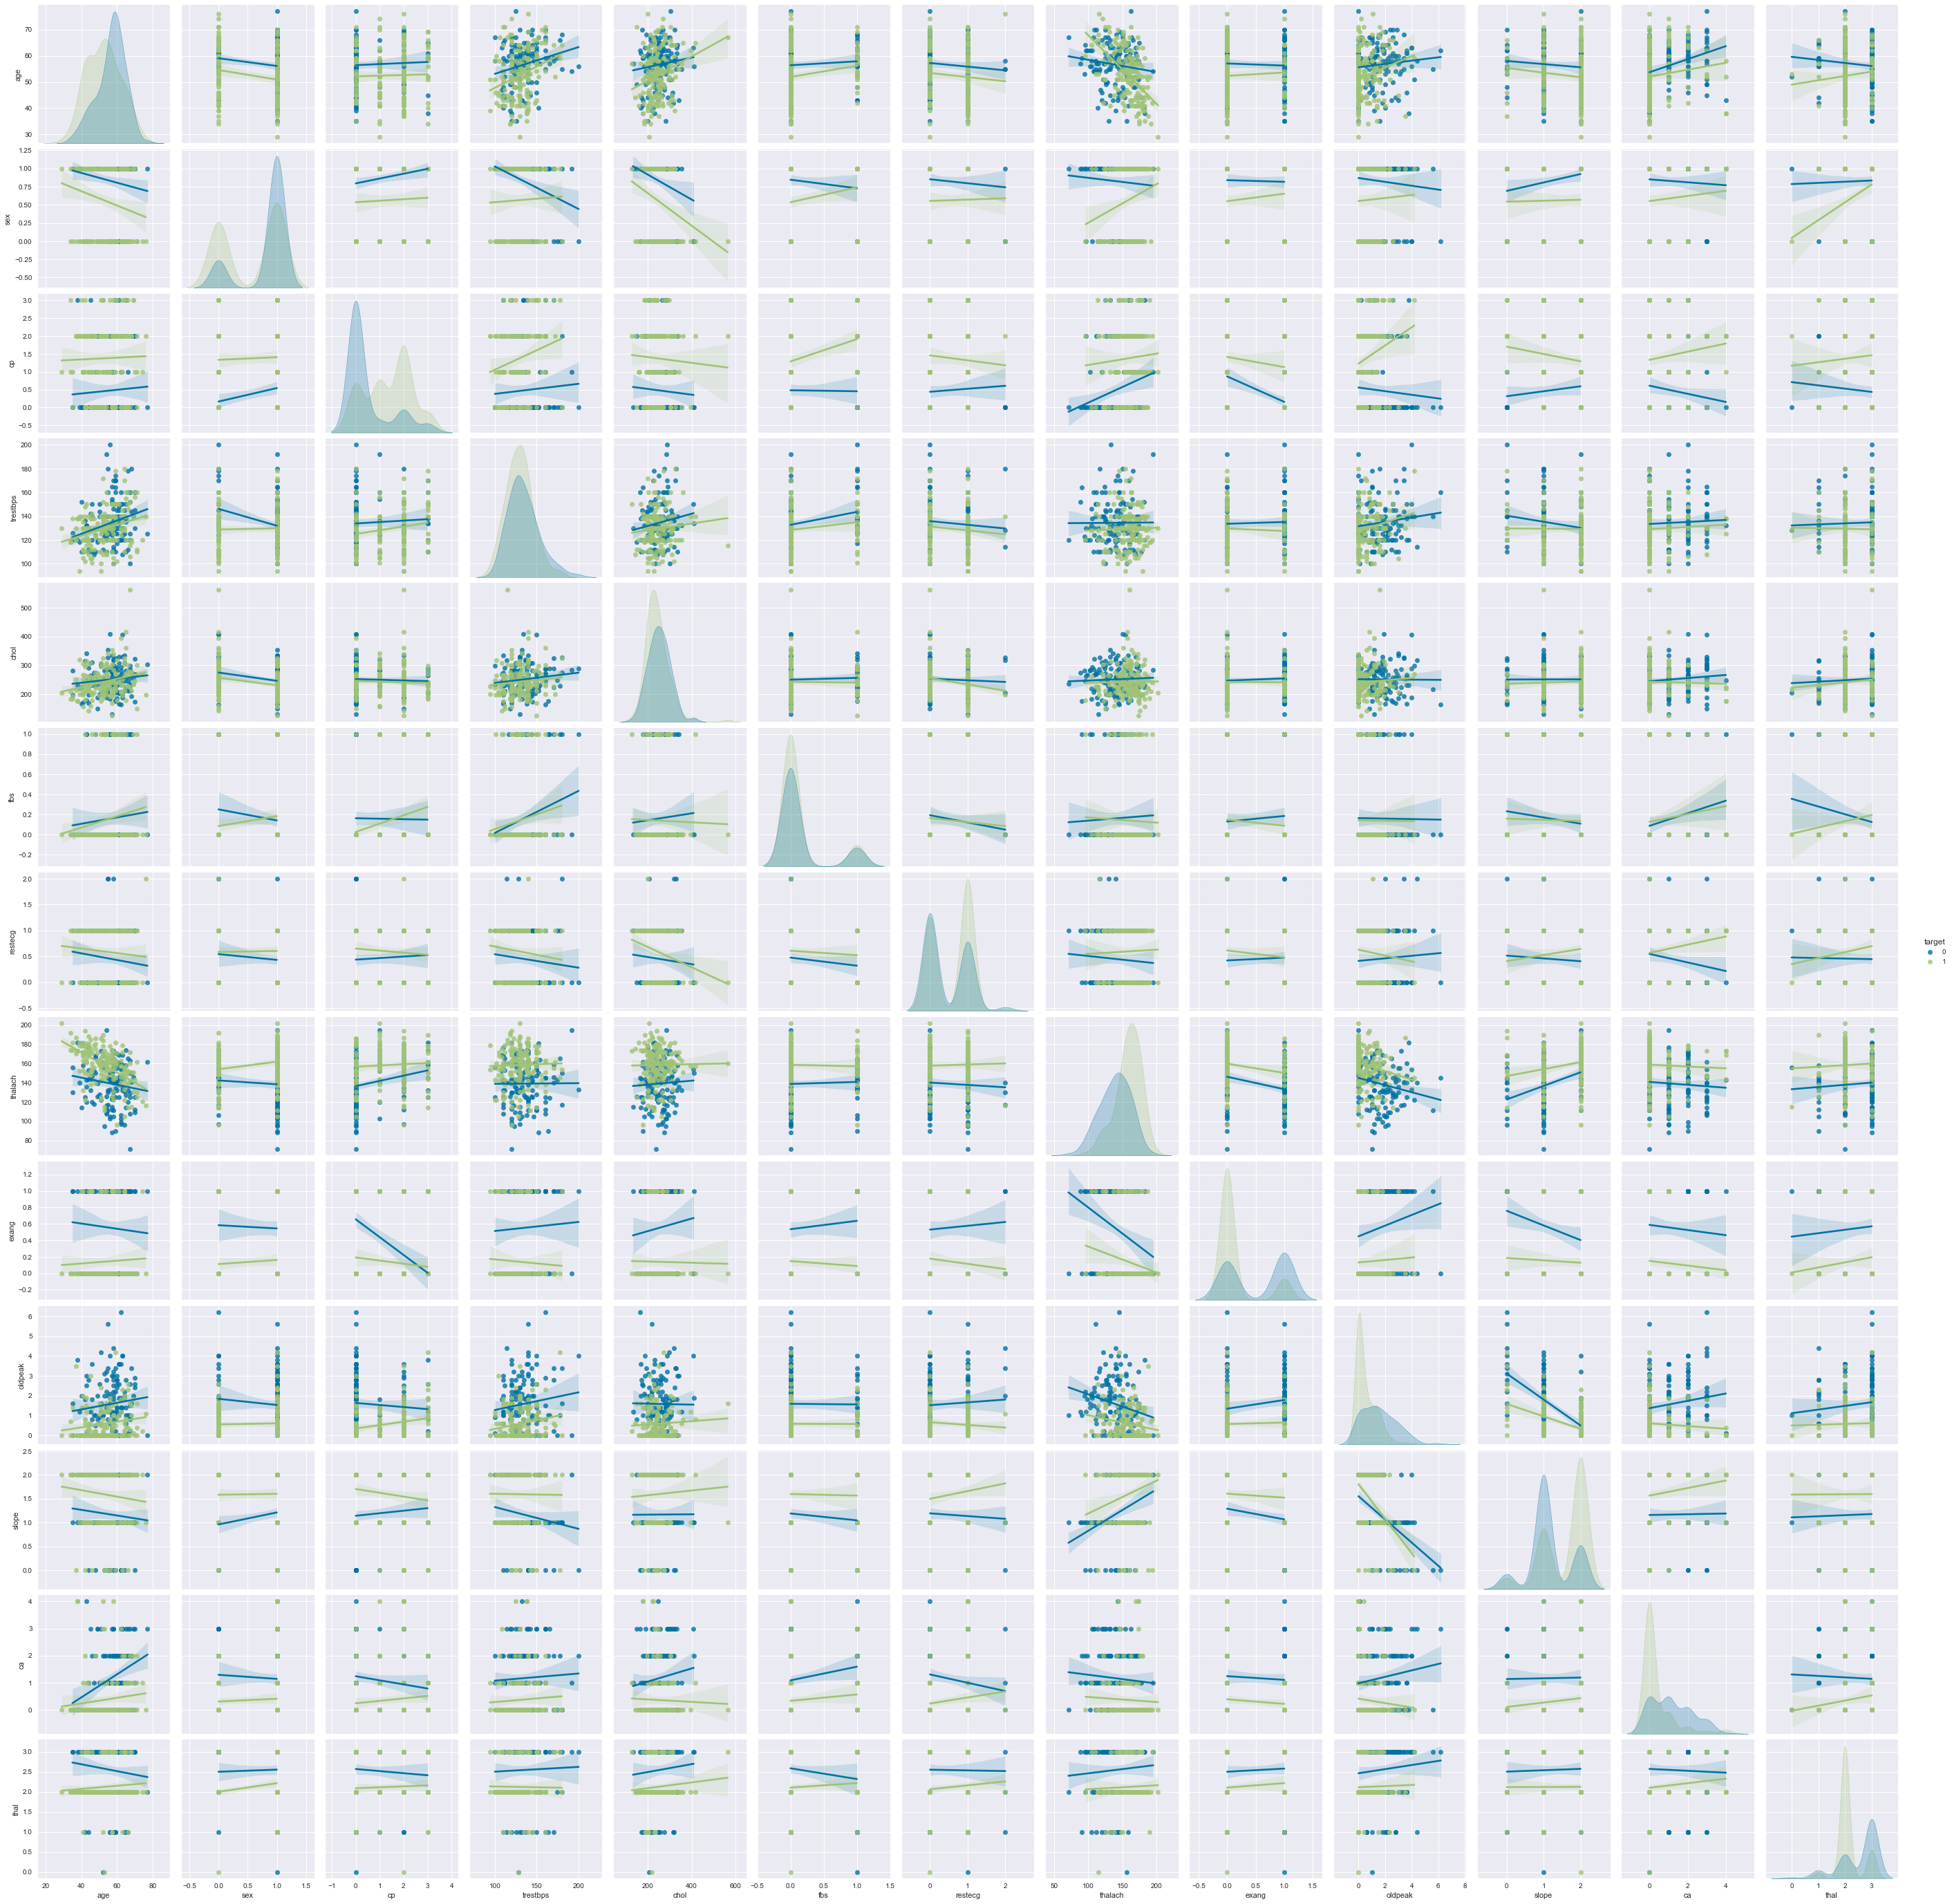

In [11]:
# Understanding the relationship between all features:

sns.set_style('darkgrid')
sns.pairplot(df , hue = 'target' , size = 3 , kind = 'reg')
plt.show()

# 3. Data Preprocessing

In [12]:
# Checking for duplicate values: we will consider the 1st duplicate as original and delete the rest

df[df.duplicated(keep = 'first')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [13]:
# Dropping the duplicate values: 
'''keep = ‘first’ is used to keep the first row of duplicated ones.

inplace = True is used to change the data frame permanently. If we didn't use inplace attributes, we would not remove the 
duplicated observation from the dataset.'''

df.drop_duplicates(keep = 'first', inplace = True)

In [14]:
# Converting Categorical features into Numerical features: ONE HOT ENCODING

# Creating dummy variables for a wide range of categorical variables: that is if the unique value is more than 2

cp = pd.get_dummies(df['cp'] , prefix = 'cp')
restecg = pd.get_dummies(df['restecg'] , prefix = 'restecg')
slope = pd.get_dummies(df['slope'] , prefix = 'slope')
ca = pd.get_dummies(df['ca'] , prefix = 'ca')
thal = pd.get_dummies(df['thal'] , prefix = 'thal')

# Merging dummy variables to the dataframe and dropping the unnecessary columns:

frames = [df, cp, restecg,  thal, slope, ca]
df = pd.concat(frames , axis = 1)
df = df.drop(columns = ['cp' , 'restecg' , 'slope' , 'ca' , 'thal'])

df


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,thal_2,thal_3,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,1,0,1,0,0,1,0,0,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,1,0,0,0,1,1,0,0,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,1,0,0,0,1,1,0,0,0,0
4,57,0,120,354,0,163,1,0.6,1,1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,1,...,0,1,0,1,0,1,0,0,0,0
299,45,1,110,264,0,132,0,1.2,0,0,...,0,1,0,1,0,1,0,0,0,0
300,68,1,144,193,1,141,0,3.4,0,1,...,0,1,0,1,0,0,0,1,0,0
301,57,1,130,131,0,115,1,1.2,0,1,...,0,1,0,1,0,0,1,0,0,0


In [15]:
# Removing outliers: IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls

index_list = []

for features in ['trestbps', 'chol', 'thalach', 'oldpeak']:
    index_list.extend(outliers(df , features))
index_list

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

df1 = remove(df, index_list)
display(df1.head())
df1.shape[0]

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,thal_2,thal_3,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,1,0,1,0,0,1,0,0,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,1,0,0,0,1,1,0,0,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,1,0,0,0,1,1,0,0,0,0
4,57,0,120,354,0,163,1,0.6,1,1,...,1,0,0,0,1,1,0,0,0,0


283

Inference: Before removing the outliers, we had 303 columns and after removing the outliers, we now have 283 columns.

#  4. Data Manipulation:

In [16]:
# Splitting the data into training and testing data sets:

df = df1.copy()

X = df.drop(['target'] , axis = 1) # all independent features
Y = df['target']  # target is a dependent feature

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , train_size = 0.8 , test_size = 0.2 , random_state = 0)

print("Orginal Set --->" , X.shape , Y.shape, '\nTraining Set --->', X_train.shape , Y_train.shape, '\nTesting Set--->',
       X_test.shape , Y_test.shape)

Orginal Set ---> (283, 27) (283,) 
Training Set ---> (226, 27) (226,) 
Testing Set---> (57, 27) (57,)


In [17]:
# Feature Scaling (Standardization):

std = StandardScaler()

print("Standardization on Training Set".center(100))

X_train_std = std.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std ,  columns = X.columns)
display(X_train_std.describe())

print("Standardization on Testing Set".center(100))

X_test_std = std.fit_transform(X_test)
X_test_std = pd.DataFrame(X_test_std , columns = X.columns)
display(X_test_std.describe())

                                  Standardization on Training Set                                   


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,thal_2,thal_3,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4
count,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,...,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,226.00000,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02,2.260000e+02
mean,-2.692045e-16,3.684368e-17,-8.439660e-16,9.186359e-17,1.174085e-16,3.890693e-16,-2.947495e-17,3.168557e-17,3.929993e-17,9.284608e-17,...,-2.456246e-17,6.779238e-17,-7.270487e-17,-2.750995e-17,0.00000,-1.228123e-16,1.021798e-16,-1.178998e-17,1.201104e-16,1.328829e-16
std,1.002220e+00,1.002220e+00,1.002220e+00,1.002220e+00,1.002220e+00,1.002220e+00,1.002220e+00,1.002220e+00,1.002220e+00,1.002220e+00,...,1.002220e+00,1.002220e+00,1.002220e+00,1.002220e+00,1.00222,1.002220e+00,1.002220e+00,1.002220e+00,1.002220e+00,1.002220e+00
min,-2.607218e+00,-1.492840e+00,-2.380390e+00,-2.557595e+00,-4.061385e-01,-2.851170e+00,-6.491407e-01,-9.012099e-01,-9.315410e-01,-4.707671e-01,...,-1.153212e+00,-7.402332e-01,-2.470483e-01,-8.908708e-01,-1.00000,-1.195871e+00,-5.398412e-01,-3.683455e-01,-2.368011e-01,-1.159867e-01
25%,-8.854039e-01,-1.492840e+00,-6.396094e-01,-7.388999e-01,-4.061385e-01,-5.619867e-01,-6.491407e-01,-9.012099e-01,-9.315410e-01,-4.707671e-01,...,-1.153212e+00,-7.402332e-01,-2.470483e-01,-8.908708e-01,-1.00000,-1.195871e+00,-5.398412e-01,-3.683455e-01,-2.368011e-01,-1.159867e-01
50%,4.172674e-02,6.698641e-01,2.992151e-02,-8.734231e-02,-4.061385e-01,1.236062e-01,-6.491407e-01,-3.170605e-01,-9.315410e-01,-4.707671e-01,...,8.671436e-01,-7.402332e-01,-2.470483e-01,-8.908708e-01,0.00000,8.362106e-01,-5.398412e-01,-3.683455e-01,-2.368011e-01,-1.159867e-01
75%,6.774734e-01,6.698641e-01,6.994524e-01,6.378696e-01,-4.061385e-01,7.627183e-01,1.540498e+00,5.591637e-01,1.073490e+00,-4.707671e-01,...,8.671436e-01,1.350926e+00,-2.470483e-01,1.122497e+00,1.00000,8.362106e-01,-5.398412e-01,-3.683455e-01,-2.368011e-01,-1.159867e-01
max,2.478756e+00,6.698641e-01,2.708045e+00,2.745517e+00,2.462214e+00,2.354688e+00,1.540498e+00,2.993120e+00,1.073490e+00,2.124193e+00,...,8.671436e-01,1.350926e+00,4.047791e+00,1.122497e+00,1.00000,8.362106e-01,1.852396e+00,2.714843e+00,4.222953e+00,8.621678e+00


                                   Standardization on Testing Set                                   


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,thal_2,thal_3,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4
count,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,57.000000,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,...,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01
mean,-2.006192e-16,1.168656e-16,-3.335538e-16,-3.505967e-17,0.000000,-5.229735e-16,1.558208e-17,7.596263e-17,-2.337312e-17,-1.363432e-17,...,1.480297e-16,-4.674623e-17,8.277979e-17,1.207611e-16,3.505967e-17,2.337312e-17,2.181491e-16,6.427607e-17,3.116416e-17,-5.453727e-17
std,1.008889e+00,1.008889e+00,1.008889e+00,1.008889e+00,1.008889,1.008889e+00,1.008889e+00,1.008889e+00,1.008889e+00,1.008889e+00,...,1.008889e+00,1.008889e+00,1.008889e+00,1.008889e+00,1.008889e+00,1.008889e+00,1.008889e+00,1.008889e+00,1.008889e+00,1.008889e+00
min,-2.800318e+00,-1.673320e+00,-2.203809e+00,-2.449410e+00,-0.404061,-2.174709e+00,-8.224783e-01,-1.048078e+00,-8.838835e-01,-4.040610e-01,...,-1.054093e+00,-8.838835e-01,-2.357023e-01,-1.054093e+00,-8.528029e-01,-1.131371e+00,-5.163978e-01,-4.040610e-01,-2.747211e-01,-1.336306e-01
25%,-5.123685e-01,-1.673320e+00,-6.632217e-01,-6.873283e-01,-0.404061,-7.118457e-01,-8.224783e-01,-1.048078e+00,-8.838835e-01,-4.040610e-01,...,-1.054093e+00,-8.838835e-01,-2.357023e-01,-1.054093e+00,-8.528029e-01,-1.131371e+00,-5.163978e-01,-4.040610e-01,-2.747211e-01,-1.336306e-01
50%,1.605579e-01,5.976143e-01,-7.068821e-02,-6.945549e-02,-0.404061,1.958589e-02,-8.224783e-01,-5.571177e-02,-8.838835e-01,-4.040610e-01,...,9.486833e-01,-8.838835e-01,-2.357023e-01,9.486833e-01,-8.528029e-01,8.838835e-01,-5.163978e-01,-4.040610e-01,-2.747211e-01,-1.336306e-01
75%,6.988989e-01,5.976143e-01,5.218453e-01,7.543749e-01,-0.404061,9.434995e-01,1.215838e+00,7.381810e-01,1.131371e+00,-4.040610e-01,...,9.486833e-01,1.131371e+00,-2.357023e-01,9.486833e-01,1.172604e+00,8.838835e-01,-5.163978e-01,-4.040610e-01,-2.747211e-01,-1.336306e-01
max,1.775581e+00,5.976143e-01,2.299446e+00,1.921468e+00,2.474874,1.559442e+00,1.215838e+00,2.524440e+00,1.131371e+00,2.474874e+00,...,9.486833e-01,1.131371e+00,4.242641e+00,9.486833e-01,1.172604e+00,8.838835e-01,1.936492e+00,2.474874e+00,3.640055e+00,7.483315e+00


# 5. Feature Selection/Extraction:

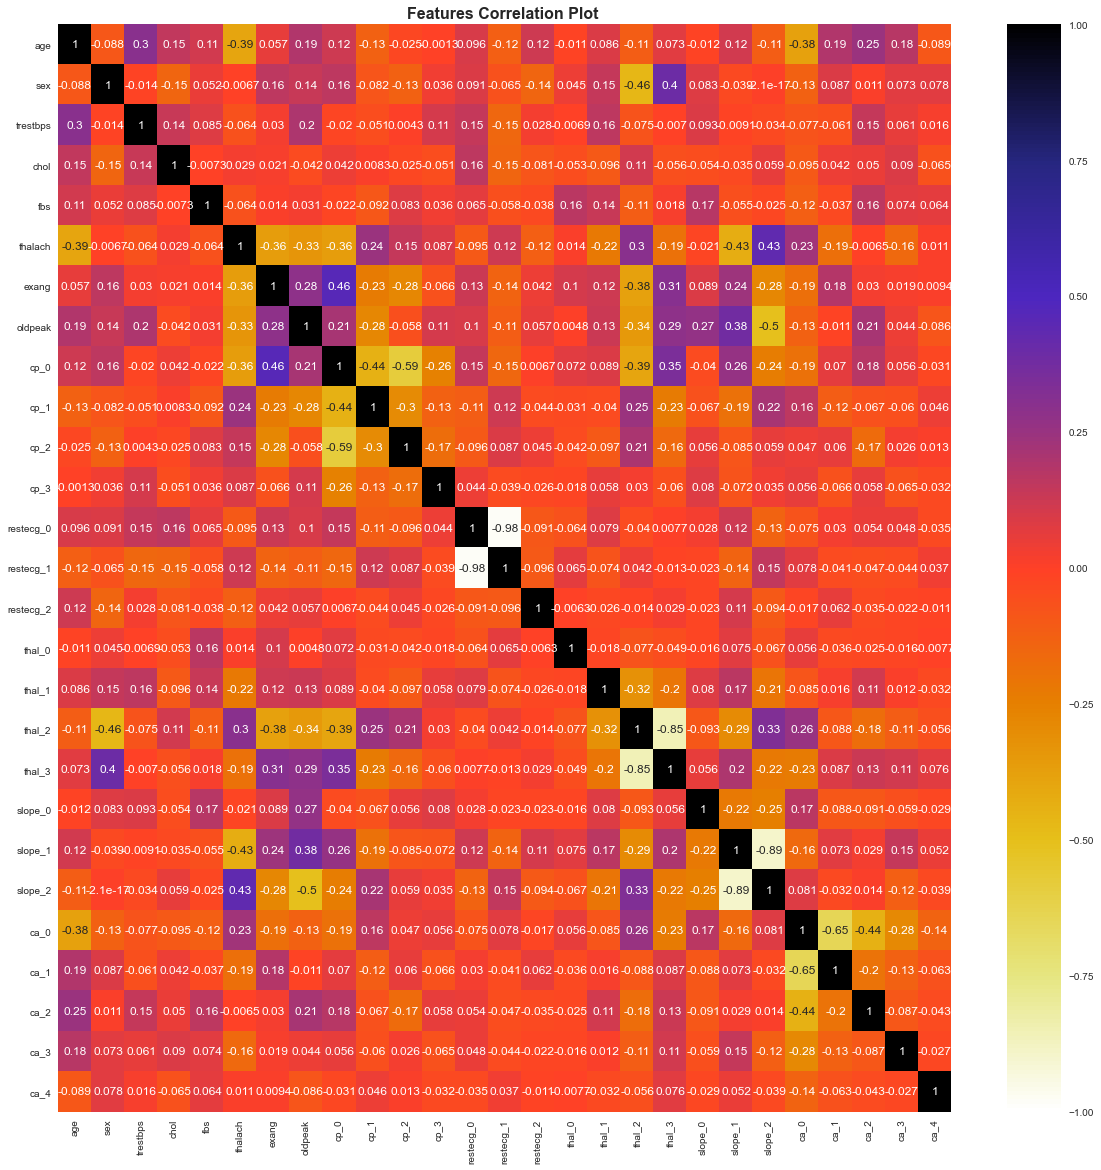

In [18]:
# Understanding the correlation:

corr = X_train.corr()
plt.figure(figsize = [20,20])
plt.title("Features Correlation Plot".center(50), fontweight = 'heavy', fontsize = 16)
sns.heatmap(data = corr , vmin = -1 , vmax = 1, annot = True , cmap = plt.cm.CMRmap_r)
plt.show()

In [19]:
# Selecting highly correlated features:

def correlation(dataset , threshold):
    col_corr = set() #set of all the names of the correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                colname = corr_matrix.columns[i] #getting the name of the column
                col_corr.add(colname)
    return col_corr

corr_features = correlation (X_train , 0.8)
corr_features

set()

Inference:

1. If we take the absolute value, then a few features can be dropped.In our case, it is important to ignore the absoute value since the rise in one features shows some correlation in fall in another feature.

# 6. Predictive Modelling

# 6.1. LOGISTIC REGRESSION

In [20]:
# Applying Logistic Regression:

LR_model = LogisticRegression(max_iter = 1000 , random_state = 1 , solver = 'liblinear' , penalty = 'l2')
LR_model.fit(X_train , Y_train)

LogisticRegression(max_iter=1000, random_state=1, solver='liblinear')

Logistic Regression Accuracy: 89.47 %
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.93      0.87      0.90        30

    accuracy                           0.89        57
   macro avg       0.90      0.90      0.89        57
weighted avg       0.90      0.89      0.89        57

Performance Evaluation:


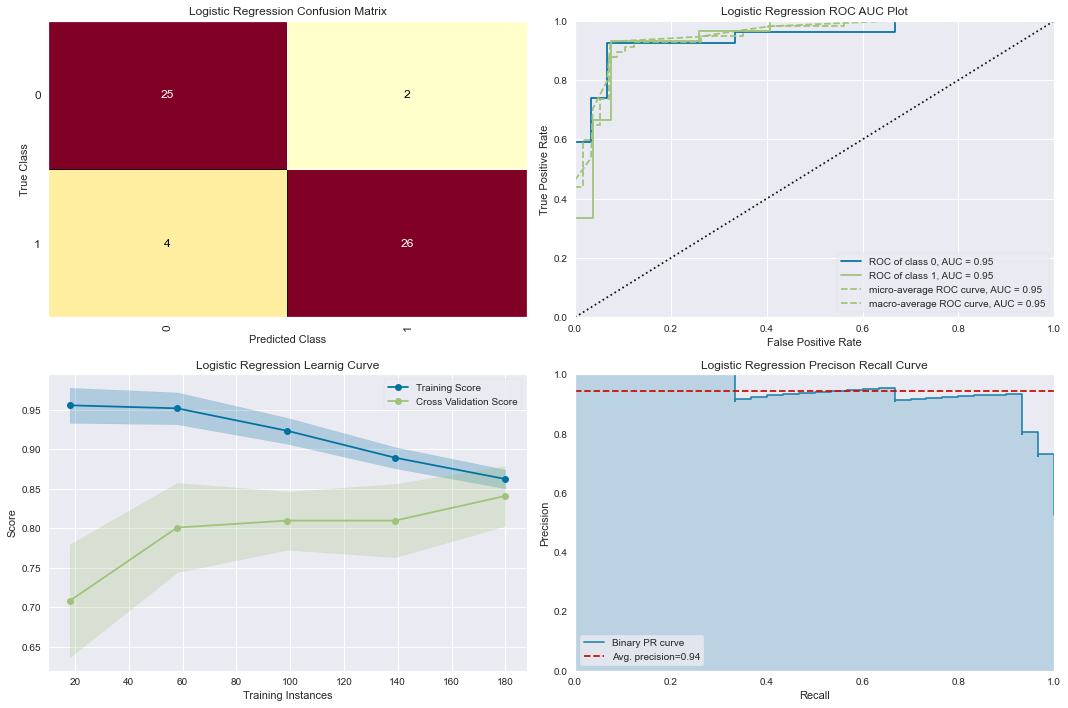

In [21]:
# LR Accuracy:

pred = LR_model.predict(X_test)
LR_acc = accuracy_score(Y_test , pred)
print("Logistic Regression Accuracy:" , round(LR_acc*100, 2), '%')


# Classification Report:

print("Classification Report:")
print(classification_report(Y_test, pred))


# Performance Evaluation:

print("Performance Evaluation:")
fig,((ax1 , ax2) , (ax3 , ax4)) = plt.subplots(2,2,figsize = [15,10])


# Confusion Matrix : True positive , false positive , false negative , true negative

LR_matrix = ConfusionMatrix(LR_model , ax = ax1 , title = "Logistic Regression Confusion Matrix")
LR_matrix.score(X_test , Y_test)
LR_matrix.finalize()


# ROC AUC:

LR_rocauc = ROCAUC(LR_model , ax = ax2 , title = "Logistic Regression ROC AUC Plot")
LR_rocauc.fit(X_train , Y_train)
LR_rocauc.score(X_test , Y_test)
LR_rocauc.finalize()


# Learning Curve:

LR_lc = LearningCurve(LR_model , ax = ax3 , title = "Logistic Regression Learnig Curve", classes = ['False' , 'True'])
LR_lc.fit(X_train , Y_train)
LR_lc.finalize()


# Precison Recall Curve

LR_prc = PrecisionRecallCurve(LR_model , ax = ax4 , title = "Logistic Regression Precison Recall Curve" , ap_score = True, 
                             iso_f1_curves = False)
LR_prc.fit(X_train , Y_train)
LR_prc.score(X_test , Y_test)
LR_prc.finalize()

plt.tight_layout()

# 6.2. RANDOM FOREST

In [22]:
# Applying Random Forest:

RF_model = RandomForestClassifier(n_estimators = 1000 , random_state = 1)
RF_model.fit(X_train , Y_train)

RandomForestClassifier(n_estimators=1000, random_state=1)

Random Forest Classifier Accuracy: 85.96 %
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.89      0.83      0.86        30

    accuracy                           0.86        57
   macro avg       0.86      0.86      0.86        57
weighted avg       0.86      0.86      0.86        57

Performance Evaluation:


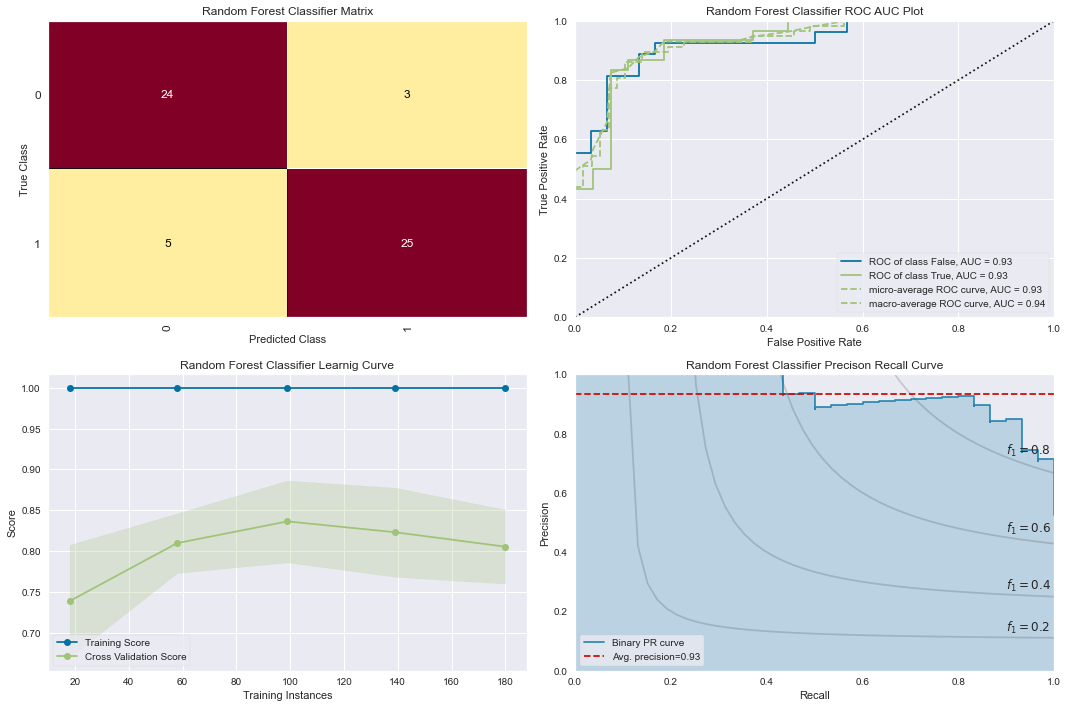

In [23]:
#  Accuracy:

pred = RF_model.predict(X_test)
RF_acc = accuracy_score(Y_test, pred)
print("Random Forest Classifier Accuracy:" , round(RF_acc*100 ,2), '%')


# Classification Report:

print("Classification Report:")
print(classification_report(Y_test, pred))


# Performance Evaluation:

print("Performance Evaluation:")
fig,((ax1 , ax2) , (ax3 , ax4)) = plt.subplots(2,2,figsize = [15,10])


# Confusion Matrix : True positive , false positive , false negative , true negative

RF_matrix = ConfusionMatrix(RF_model , ax = ax1 , title = "Random Forest Classifier Matrix")
RF_matrix.score(X_test , Y_test)
RF_matrix.finalize()


# ROC AUC:

RF_rocauc = ROCAUC(RF_model , ax = ax2 , title = "Random Forest Classifier ROC AUC Plot" , classes = ['False' , 'True'])
RF_rocauc.fit(X_train , Y_train)
RF_rocauc.score(X_test , Y_test)
RF_rocauc.finalize()


# Learning Curve:

RF_lc = LearningCurve(RF_model , ax = ax3 , title = "Random Forest Classifier Learnig Curve")
RF_lc.fit(X_train , Y_train)
RF_lc.finalize()


# Precison Recall Curve

RF_prc = PrecisionRecallCurve(RF_model , ax = ax4 , title = "Random Forest Classifier Precison Recall Curve" , 
                              ap_score = True, 
                             iso_f1_curves = True)
RF_prc.fit(X_train , Y_train)
RF_prc.score(X_test , Y_test)
RF_prc.finalize()

plt.tight_layout()

# 6.3 KNN

In [24]:
# Applying KNN:

KNN_model = KNeighborsClassifier(n_neighbors = 3)
KNN_model.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=3)

KNN Classifier Accuracy: 64.91 %
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.52      0.58        27
           1       0.64      0.77      0.70        30

    accuracy                           0.65        57
   macro avg       0.65      0.64      0.64        57
weighted avg       0.65      0.65      0.64        57

Performance Evaluation:


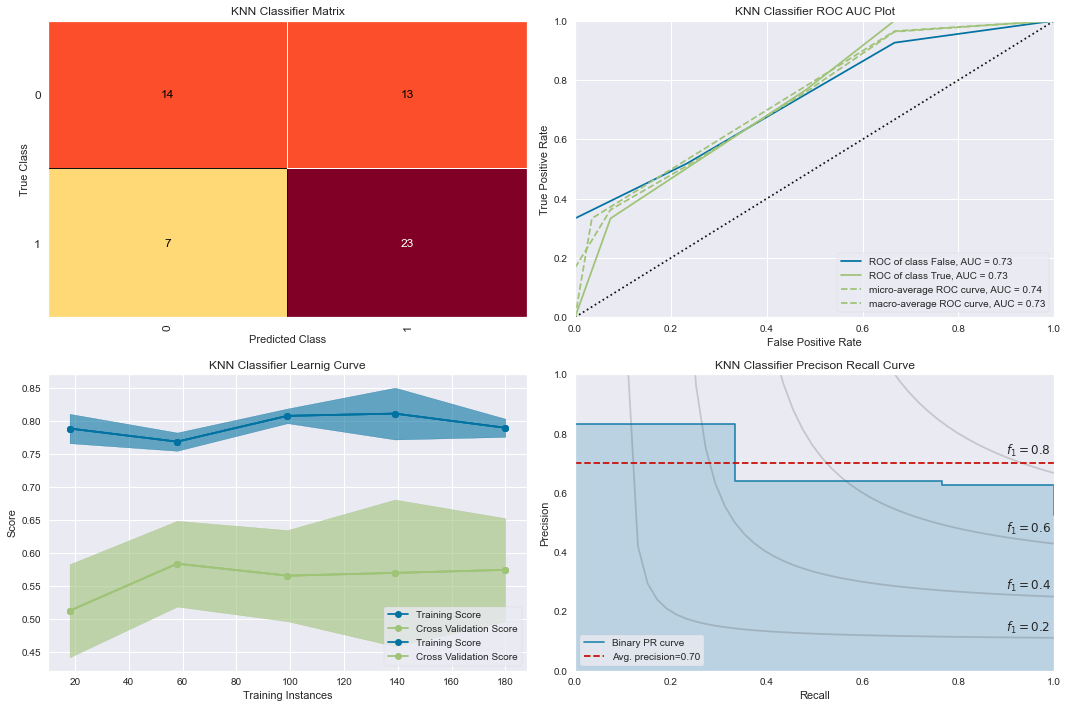

In [25]:
#  Accuracy:

pred = KNN_model.predict(X_test)
KNN_acc = accuracy_score(Y_test, pred)
print("KNN Classifier Accuracy:" , round(KNN_acc*100, 2) , '%')


# Classification Report:

print("Classification Report:")
print(classification_report(Y_test, pred))


# Performance Evaluation:

print("Performance Evaluation:")
fig,((ax1 , ax2) , (ax3 , ax4)) = plt.subplots(2,2,figsize = [15,10])


# Confusion Matrix : True positive , false positive , false negative , true negative

KNN_matrix = ConfusionMatrix(KNN_model , ax = ax1 , title = "KNN Classifier Matrix")
KNN_matrix.score(X_test , Y_test)
KNN_matrix.finalize()


# ROC AUC:

KNN_rocauc = ROCAUC(KNN_model , ax = ax2 , title = "KNN Classifier ROC AUC Plot" , classes = ['False' , 'True'])
KNN_rocauc.fit(X_train , Y_train)
KNN_rocauc.score(X_test , Y_test)
KNN_rocauc.finalize()


# Learning Curve:

KNN_lc = LearningCurve(KNN_model , ax = ax3 , title = "KNN Classifier Learnig Curve")
KNN_lc.fit(X_train , Y_train)
KNN_lc.fit(X_train , Y_train)
KNN_lc.finalize()


# Precison Recall Curve

KNN_lc.fit(X_train , Y_train)
KNN_prc = PrecisionRecallCurve(KNN_model , ax = ax4 , title = "KNN Classifier Precison Recall Curve" , 
                              ap_score = True, 
                             iso_f1_curves = True)
KNN_prc.fit(X_train , Y_train)
KNN_prc.score(X_test , Y_test)
KNN_prc.finalize()

plt.tight_layout()

In [26]:
# Creating Accuracy Table:

table  = pd.DataFrame({'MODEL': ['Logistic Regression' , 'Random Forest', 'K Nearest Neighbors'],
                      'ACCURACY': ['89.4736 %' , '85.9649 %', '64.9122 %']})

table.sort_values(by='ACCURACY', ascending=False)

,MODEL,ACCURACY
0,Logistic Regression,89.4736 %
1,Random Forest,85.9649 %
2,K Nearest Neighbors,64.9122 %
